# Statistical Comparisons

- For a more thorough discussion of the experiments, see [the other notebook](comparisons.ipynb).
- This notebook shows averages over three runs.
- It excludes two of the ablations to not clutter the plots too much.

In [2]:
# internal modules
from utils.plot import binning
# external modules
import os
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# settings
sns.set_theme(style='dark')

## Deadlock

In [3]:
# config
dir_set = []
dir_nums = [7, 10, 11, 12, 13, 21, 24, 25, 26, 27, 35, 38, 39, 41] # 40 removed because of error
for num in dir_nums:
    dir_set.append('reset_and_deadlock/' + str(num) + '/')
dir_nums = [7, 10, 13, 21, 24, 25, 26, 27, 38] # 11, 12, 35, 39, 40, 41 removed
for num in dir_nums:
    dir_set.append('reset_and_deadlock_2/' + str(num) + '/')
n_bins = 50
zoom = 30
# load
deadlock_data_set = [pd.DataFrame() for _ in dir_set]
deadlock_raw_data_set = [pd.DataFrame() for _ in dir_set]
for i, dir in enumerate(dir_set):
    path = 'results/' + dir
    raw = pd.read_csv(
        path + 'data.csv',
        index_col='time step',
        usecols=['time step', 'reward', 'side effects incidence', 'agent', 'regulatory constraints'],
    )
    deadlock_data_set[i] = binning(raw[:200], 'reward', n_bins, kind='mean')
    deadlock_data_set[i]['side effects incidence'] = binning(raw[:200], 'side effects incidence', n_bins, kind='mean')['side effects incidence']
    deadlock_data_set[i]['agent s.t. regulatory constraints'] = raw['agent'][1] + '\n' + raw['regulatory constraints'][1]
    deadlock_raw_data_set[i] = raw[:zoom+1]
    deadlock_raw_data_set[i]['agent s.t. regulatory constraints'] = raw['agent'][1] + '\n' + raw['regulatory constraints'][1]
deadlock_data = pd.concat(deadlock_data_set)
deadlock_raw_data = pd.concat(deadlock_raw_data_set)




/tmp/ipykernel_456027/1137202844.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deadlock_raw_data_set[i]['agent s.t. regulatory constraints'] = raw['agent'][1] + '\n' + raw['regulatory constraints'][1]
/tmp/ipykernel_456027/1137202844.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deadlock_raw_data_set[i]['agent s.t. regulatory constraints'] = raw['agent'][1] + '\n' + raw['regulatory constraints'][1]
/tmp/ipykernel_456027/1137202844.py:25: SettingWithCopyWarning: 
A value is trying to be set on 

KeyboardInterrupt: 

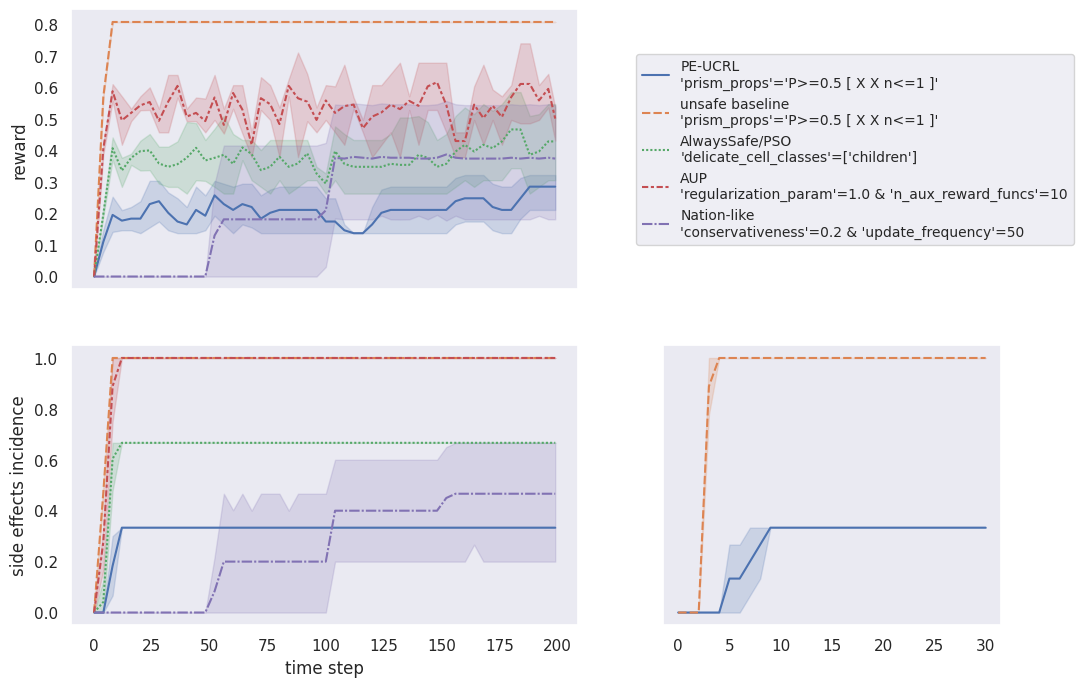

In [4]:
fig, [[reward, text], [side_effects, zoom_in]] = plt.subplots(
    2,
    2,
    sharex='col',
    sharey='row',
    figsize=(12, 8),
    gridspec_kw={'width_ratios': [3, 2]}
)
sns.lineplot(
    data=deadlock_data,
    x='time step',
    y='reward',
    ax = reward,
    hue='agent s.t. regulatory constraints',
    style='agent s.t. regulatory constraints',
    legend=True,
).legend(loc='center left', fontsize=10, bbox_to_anchor=(1.1, 0.5))
text.axis('off')
sns.lineplot(
    data=deadlock_data,
    x='time step',
    y='side effects incidence',
    ax = side_effects,
    hue='agent s.t. regulatory constraints',
    style='agent s.t. regulatory constraints',
    legend=False,
)
sns.lineplot(
    data=deadlock_raw_data,
    x='time step',
    y='side effects incidence',
    ax = zoom_in,
    hue='agent s.t. regulatory constraints',
    style='agent s.t. regulatory constraints',
    legend=False,
)
fig.suptitle("'polarisation in recommender engines' environment\ndeadlock variant")

Text(0.5, 0.98, "'polarisation in recommender engines' environment\ndeadlock variant")

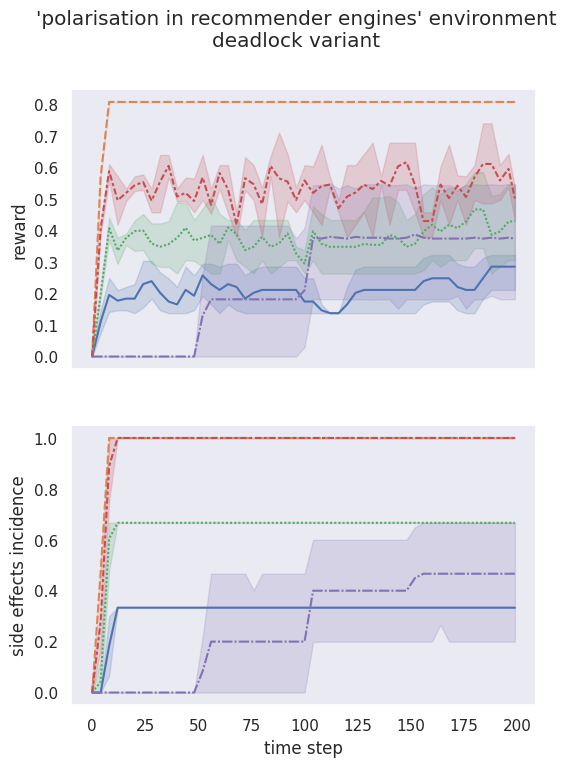

In [7]:
fig, [reward, side_effects] = plt.subplots(
    2,
    1,
    sharex='col',
    sharey='row',
    figsize=(6, 8),
    #gridspec_kw={'width_ratios': [3, 2]}
)
sns.lineplot(
    data=deadlock_data,
    x='time step',
    y='reward',
    ax = reward,
    hue='agent s.t. regulatory constraints',
    style='agent s.t. regulatory constraints',
    legend=False,
)
#text.axis('off')
sns.lineplot(
    data=deadlock_data,
    x='time step',
    y='side effects incidence',
    ax = side_effects,
    hue='agent s.t. regulatory constraints',
    style='agent s.t. regulatory constraints',
    legend=False,
)
# sns.lineplot(
#     data=deadlock_raw_data,
#     x='time step',
#     y='side effects incidence',
#     ax = zoom_in,
#     hue='agent s.t. regulatory constraints',
#     style='agent s.t. regulatory constraints',
#     legend=False,
# )
fig.suptitle("'polarisation in recommender engines' environment\ndeadlock variant")

## Reset

In [25]:
# config
dir_set = []
dir_nums = [0, 3, 4, 5, 6, 14, 17, 18, 19, 20, 28, 31, 32, 34] # 33 removed because of error
for num in dir_nums:
    dir_set.append('reset_and_deadlock/' + str(num) + '/')
dir_nums = [0, 3, 4, 5, 14, 17, 18, 28, 31, 32] # 6, 19, 20, 33, 34 removed
n_bins = 50
zoom = 30
# load
data_set = [pd.DataFrame() for _ in dir_set]
raw_data_set = [pd.DataFrame() for _ in dir_set]
for i, dir in enumerate(dir_set):
    path = 'results/' + dir
    raw = pd.read_csv(
        path + 'data.csv',
        index_col='time step',
        usecols=['time step', 'reward', 'side effects incidence', 'agent', 'regulatory constraints'],
    )
    data_set[i] = binning(raw, 'reward', n_bins, kind='mean')
    data_set[i]['side effects incidence'] = binning(raw, 'side effects incidence', n_bins, kind='mean')['side effects incidence']
    data_set[i]['agent s.t. regulatory constraints'] = raw['agent'][1] + '\n' + raw['regulatory constraints'][1]
    raw_data_set[i] = raw[:zoom+1]
    raw_data_set[i]['agent s.t. regulatory constraints'] = raw['agent'][1] + '\n' + raw['regulatory constraints'][1]
data = pd.concat(data_set)
raw_data = pd.concat(raw_data_set)


/tmp/ipykernel_313752/24529230.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data_set[i]['agent s.t. regulatory constraints'] = raw['agent'][1] + '\n' + raw['regulatory constraints'][1]
/tmp/ipykernel_313752/24529230.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_data_set[i]['agent s.t. regulatory constraints'] = raw['agent'][1] + '\n' + raw['regulatory constraints'][1]
/tmp/ipykernel_313752/24529230.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

Text(0.5, 0.98, "'polarisation in recommender engines' environment\nreset variant")

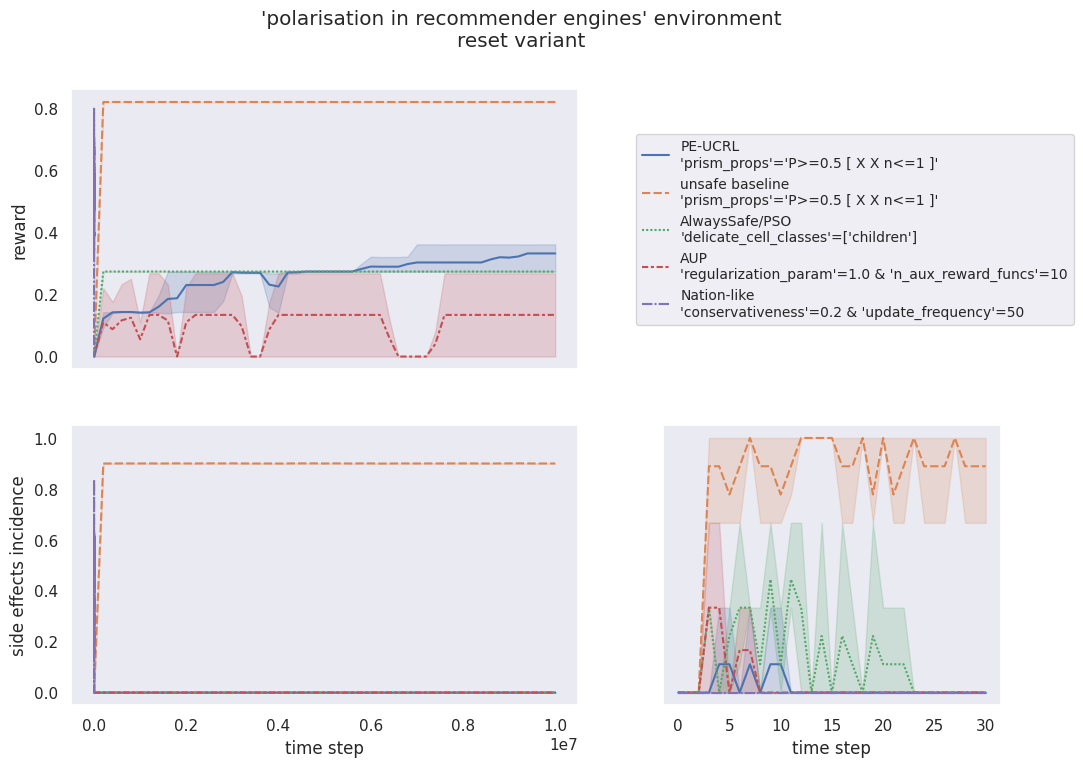

In [26]:
fig, [[reward, text], [side_effects, zoom_in]] = plt.subplots(
    2,
    2,
    sharex='col',
    sharey='row',
    figsize=(12, 8),
    gridspec_kw={'width_ratios': [3, 2]}
)
sns.lineplot(
    data=data,
    x='time step',
    y='reward',
    ax = reward,
    hue='agent s.t. regulatory constraints',
    style='agent s.t. regulatory constraints',
    legend=True,
).legend(loc='center left', fontsize=10, bbox_to_anchor=(1.1, 0.5))
text.axis('off')
sns.lineplot(
    data=data,
    x='time step',
    y='side effects incidence',
    ax = side_effects,
    hue='agent s.t. regulatory constraints',
    style='agent s.t. regulatory constraints',
    legend=False,
)
sns.lineplot(
    data=raw_data,
    x='time step',
    y='side effects incidence',
    ax = zoom_in,
    hue='agent s.t. regulatory constraints',
    style='agent s.t. regulatory constraints',
    legend=False,
)
fig.suptitle("'polarisation in recommender engines' environment\nreset variant")